# Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.
2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](images/activity3.PNG "bee_flower")
3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [2]:
!pip install imutils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25857 sha256=93bb69eb8dc9adf49a21b9b022f46d4834d327eef0cf2def11ad2916851ee322
  Stored in directory: c:\users\honor\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import sys
assert sys.version_info >= (3, 8)

import imutils
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

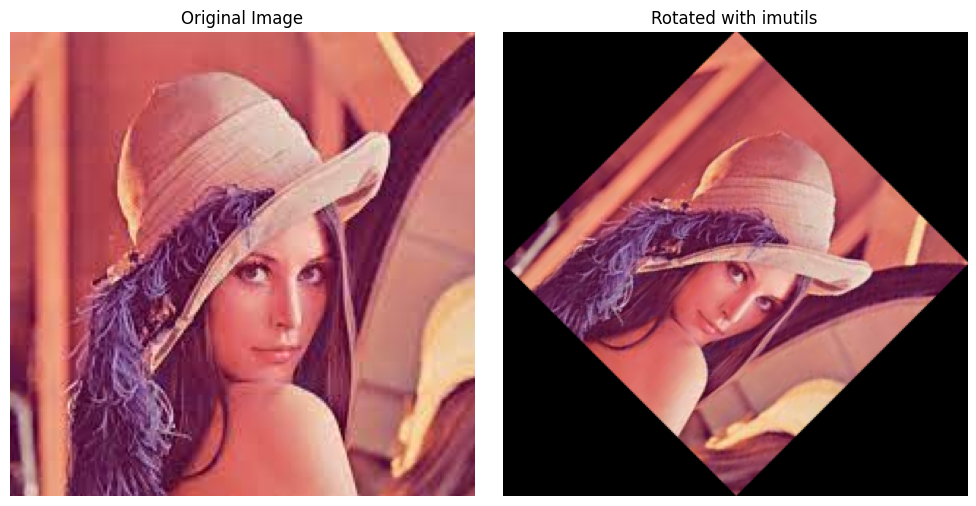

In [16]:
from imutils import rotate_bound

image = cv.imread("images/lena.jfif")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Method: Using imutils's rotate_bound function to rotate without cropping
rotated_image_imutils = rotate_bound(image_rgb, 45)

# Plot the original and rotated images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(rotated_image_imutils)
axes[1].set_title("Rotated with imutils")
axes[1].axis('off')

plt.tight_layout()
plt.show()

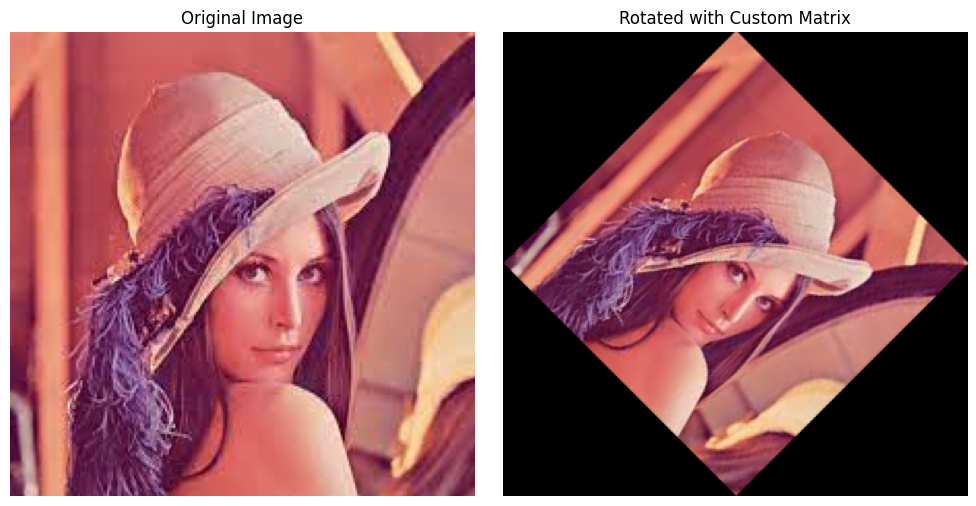

In [20]:
image = cv.imread("images/lena.jfif")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

def rotate_image(image, angle):
    # Get image dimensions
    (h, w) = image.shape[:2]
    # Calculate the center of the image
    center = (w / 2, h / 2)

    # Calculate the size of the new image after rotation
    diagonal = int(np.sqrt(h**2 + w**2))
    new_canvas_size = (diagonal, diagonal)

    # Calculate the rotation matrix
    M = cv.getRotationMatrix2D(center, angle, 1)
    # Adjust the translation component of the matrix to fit the entire image
    M[0, 2] += (diagonal - w) / 2
    M[1, 2] += (diagonal - h) / 2

    # Perform the rotation
    rotated_image = cv.warpAffine(image, M, new_canvas_size)
    return rotated_image

# Rotate the image by 45 degrees
rotated_image_custom = rotate_image(image_rgb, -45)

# Plot the original and rotated images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(rotated_image_custom)
axes[1].set_title("Rotated with Custom Matrix")
axes[1].axis('off')

plt.tight_layout()
plt.show()

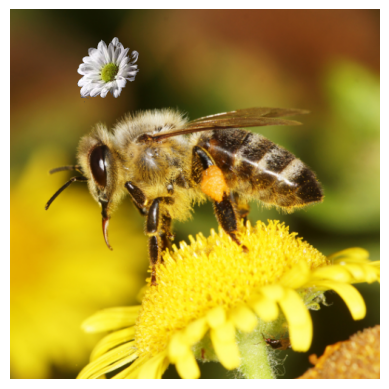

In [27]:
# Load the images
flower = cv.imread('images/flower.jfif', cv.IMREAD_COLOR)
background = cv.imread('images/native-bee.png', cv.IMREAD_COLOR)

# Get dimensions of the flower image & region of interest (ROI) in the background image
rows, cols, channels = flower.shape
roi = background[0:rows, 0:cols]

# Convert flower image to grayscale
flower_gray = cv.cvtColor(flower, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
_, mask = cv.threshold(flower_gray, 70, 255, cv2.THRESH_BINARY)

# Create inverse mask
mask_inv = cv.bitwise_not(mask)

# Black-out the area of the flower in the ROI
background_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# Take only the region of the flower from the flower image
flower_fg = cv.bitwise_and(flower, flower, mask=mask)

# Place the flower in the ROI and modify the main image
combined = cv.add(background_bg, flower_fg)
background[0:rows, 0:cols] = combined

# Convert to RGB for matplotlib display
background_rgb = cv.cvtColor(background, cv.COLOR_BGR2RGB)

# Display the final image
plt.imshow(background_rgb)
plt.axis('off')
plt.show()

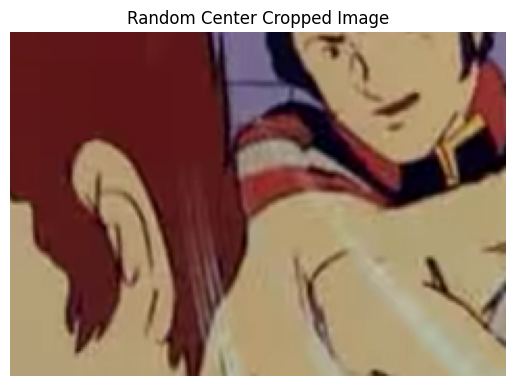

In [31]:
def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    # Get dimensions of the original image
    original_height, original_width = image.shape[:2]

    # Randomly select the crop ratio
    crop_ratio = np.random.uniform(min_crop_ratio, max_crop_ratio)

    # Calculate the size of the cropped region
    crop_height = int(original_height * crop_ratio)
    crop_width = int(original_width * crop_ratio)

    # Ensure the crop size is within the image dimensions
    crop_height = min(crop_height, original_height)
    crop_width = min(crop_width, original_width)

    # Calculate the starting and ending points for cropping
    start_x = (original_width - crop_width) // 2
    start_y = (original_height - crop_height) // 2
    end_x = start_x + crop_width
    end_y = start_y + crop_height

    # Crop the image
    cropped_image = image[start_y:end_y, start_x:end_x]

    return cropped_image

# Load an image
image = cv.imread('images/gundam.png')

# Apply the random center crop
cropped_image = random_center_crop(image, 0.5, 0.8)

# Convert the cropped image to RGB for displaying with matplotlib
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Display the cropped image
plt.imshow(cropped_image_rgb)
plt.title("Random Center Cropped Image")
plt.axis('off')
plt.show()

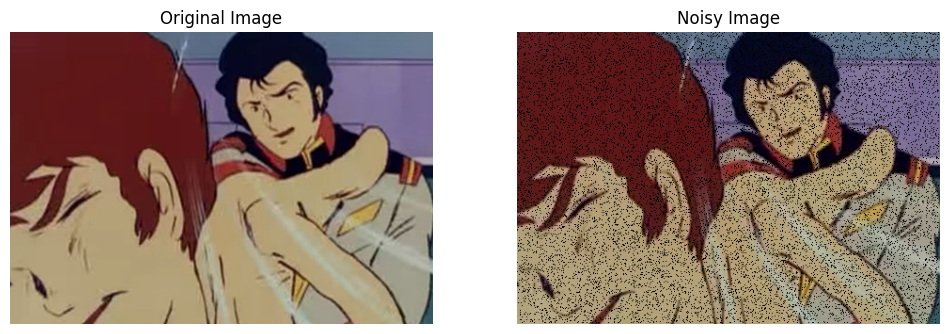

In [35]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    
    # Generate random values for each pixel
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)
    
    # Add Salt noise (white pixels)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 1
    
    # Add Pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_image

# Read an image
image = cv.imread('images/gundam.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Add salt and pepper noise
salt_prob = 0.02
pepper_prob = 0.02
noisy_image = add_salt_and_pepper_noise(image_rgb, salt_prob, pepper_prob)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.axis('off')

plt.show()